<a href="https://colab.research.google.com/github/kaustav02github/handwritten_number_recognizer/blob/main/Digit_handwriiten_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
mnist=tf.keras.datasets.mnist #images of handwritten digits
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [14]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [15]:
model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,epochs=3) #traing

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8664 - loss: 0.4659
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9680 - loss: 0.1048
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9786 - loss: 0.0685


In [16]:
loss,accu=model.evaluate(x_test,y_test)
print(loss,accu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9662 - loss: 0.1086
0.09498237073421478 0.9696999788284302


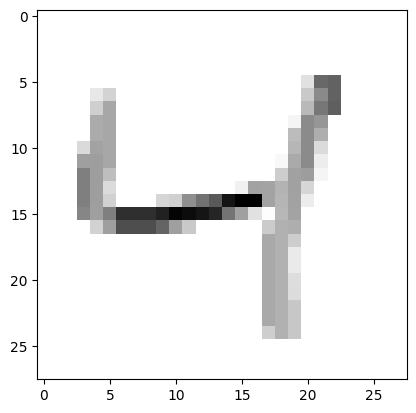

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2],cmap=plt.cm.binary)
plt.show()

In [17]:
model.save("handwritten_number_reader.keras")

In [23]:
new_model=tf.keras.models.load_model("handwritten_number_reader.keras")
predictions=new_model.predict(x_test)
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[4.08024157e-08 1.86667705e-07 1.94644713e-06 ... 9.99959826e-01
  7.35562864e-08 1.16141746e-05]
 [1.25280653e-09 7.42770790e-05 9.99921203e-01 ... 2.67448064e-10
  1.15168151e-08 5.44212638e-14]
 [1.92052653e-06 9.99336779e-01 1.29890119e-04 ... 2.79756583e-04
  2.10052167e-04 3.46579804e-06]
 ...
 [1.13430298e-09 2.48239644e-07 1.31954914e-09 ... 3.05829167e-06
  4.91857747e-07 1.83931315e-05]
 [6.65796188e-06 8.20469268e-06 1.08109225e-06 ... 2.59864669e-06
  6.26917812e-04 1.36322855e-08]
 [8.20540572e-06 6.53194775e-07 5.74368169e-05 ... 6.23011198e-09
  2.49601817e-05 7.65262627e-08]]


In [22]:
import numpy as np
print(np.argmax(predictions[1]))

2


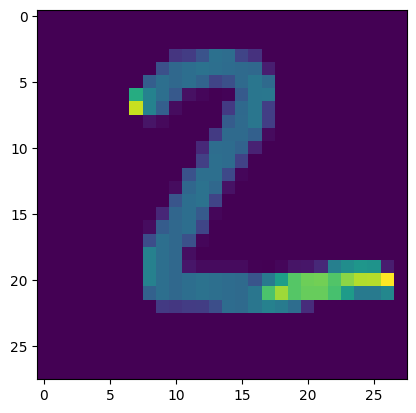

In [24]:
plt.imshow(x_test[1])
plt.show()